In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv(os.getcwd() + '/MWACSnowData.csv')

In [3]:
data.describe

<bound method NDFrame.describe of           DATE     SEASON  AVY_DANGER AVY_CHARACTER  WET_DANGER  DRY_DANGER  \
0     12/18/10  2010/2011         2.0           DRY           0           2   
1     12/19/10  2010/2011         1.0           DRY           0           1   
2     12/20/10  2010/2011         1.0           DRY           0           1   
3     12/21/10  2010/2011         3.0           DRY           0           3   
4     12/22/10  2010/2011         2.0           DRY           0           2   
...        ...        ...         ...           ...         ...         ...   
1253   3/25/20  2019/2020         3.0          BOTH           3           3   
1254   3/26/20  2019/2020         3.0           WET           3           0   
1255   3/27/20  2019/2020         2.0           DRY           0           2   
1256   3/28/20  2019/2020         1.0           DRY           0           1   
1257   3/29/20  2019/2020         2.0           WET           2           0   

      WET_LOOSE  

In [4]:
data.columns

Index(['DATE', 'SEASON', 'AVY_DANGER', 'AVY_CHARACTER', 'WET_DANGER',
       'DRY_DANGER', 'WET_LOOSE', 'WET_SLAB', 'WIND_SLAB', 'STORM_SLAB',
       'CORNICE_FALL', 'PERSISTENT_SLAB', 'DEEP_SLAB', 'DRY_LOOSE',
       'GLIDE_AVALANCHE', 'LONG_SLIDING_FALL', 'AWND', 'PGTM', 'PRCP',
       'PRCP_ATTRIBUTES', 'PSUN', 'SNOW', 'FIVE_DAY_SNOWFALL',
       'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_SWING',
       'TMAX_SWING_FROM_AVE', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'TSUN', 'TSUN_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF5',
       'WSF5_ATTRIBUTES', 'SKY CONDITION', 'PRECIP TYPE/RATE', 'FORM/SIZE',
       'HN24_CM', 'HW in Tube (MM)', 'H24W in Can (MM)', 'DENSITY (KG/M3)',
       'HST (CM)', 'HS_CM', 'SETTLEMENT/MELT', 'Surf Temp (C)', 'T-10 (C)',
       'T-20 (C)', 'CURRENT TEMP', 'X24_HR_MAX', '24HRMAX_SWING', '24 HR MIN'],
      dtype='object')

In [5]:
data["AVI_COUNT"] = data.iloc[:, 6:14].sum(axis=1)
print(data["AVI_COUNT"])

0       2.0
1       2.0
2       2.0
3       6.0
4       2.0
       ... 
1253    6.0
1254    6.0
1255    2.0
1256    1.0
1257    2.0
Name: AVI_COUNT, Length: 1258, dtype: float64


In [6]:
data['AVI_OCUR'] = np.where(data['AVI_COUNT'] > 0, 1, 0)
print(data[data['AVI_OCUR'] == 0].shape)
print(data[data['AVI_OCUR'] == 1].shape)

(143, 57)
(1115, 57)


In [37]:
train = data[data.columns.drop(list(data.filter(regex='ATTRIBUTES')))]
train = train.drop(['DATE', 'SEASON', 'AVY_CHARACTER', 'LONG_SLIDING_FALL', \
                    'SKY CONDITION', 'PRECIP TYPE/RATE', 'FORM/SIZE'], axis=1)
train.fillna(0, inplace=True)
print(train.columns)

Index(['AVY_DANGER', 'WET_DANGER', 'DRY_DANGER', 'WET_LOOSE', 'WET_SLAB',
       'WIND_SLAB', 'STORM_SLAB', 'CORNICE_FALL', 'PERSISTENT_SLAB',
       'DEEP_SLAB', 'DRY_LOOSE', 'GLIDE_AVALANCHE', 'AWND', 'PGTM', 'PRCP',
       'PSUN', 'SNOW', 'FIVE_DAY_SNOWFALL', 'SNWD', 'TMAX', 'TMAX_SWING',
       'TMAX_SWING_FROM_AVE', 'TMIN', 'TSUN', 'WDF5', 'WSF5', 'HN24_CM',
       'HW in Tube (MM)', 'H24W in Can (MM)', 'DENSITY (KG/M3)', 'HST (CM)',
       'HS_CM', 'SETTLEMENT/MELT', 'Surf Temp (C)', 'T-10 (C)', 'T-20 (C)',
       'CURRENT TEMP', 'X24_HR_MAX', '24HRMAX_SWING', '24 HR MIN', 'AVI_COUNT',
       'AVI_OCUR'],
      dtype='object')


In [38]:
x = train.iloc[:, 0:train.shape[1] - 1]
y = train.iloc[:, train.shape[1] - 1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1132, 41)
(126, 41)
(1132,)
(126,)


In [43]:
# Define SVC model
svm = SVC(kernel='rbf')

# Train model
svm.fit(x_train, y_train)

# Make predictions using the trained model on unseen data
y_pred = svm.predict(x_test)

# Print accuracy score
print(accuracy_score(y_test, y_pred))

0.9285714285714286


   0    1
0  0    9
1  0  117
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.93      1.00      0.96       117

    accuracy                           0.93       126
   macro avg       0.46      0.50      0.48       126
weighted avg       0.86      0.93      0.89       126



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


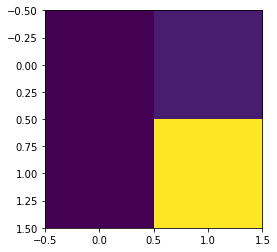

In [44]:
# Create confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print confusion matrix as dataframe
confusion_df = pd.DataFrame(confusion)
print(confusion_df)

# Display confusion matrix as heatmap
plt.imshow(confusion_df)

# Display classification report
print(classification_report(y_test, y_pred))